In [3]:
import pandas as pd

df = pd.read_csv('csv/final_dataset.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\franc\AppData\Local\Temp\ipykernel_21880\2646294146.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ganadoras_por_pais.values, y=ganadoras_por_pais.index, palette='viridis')


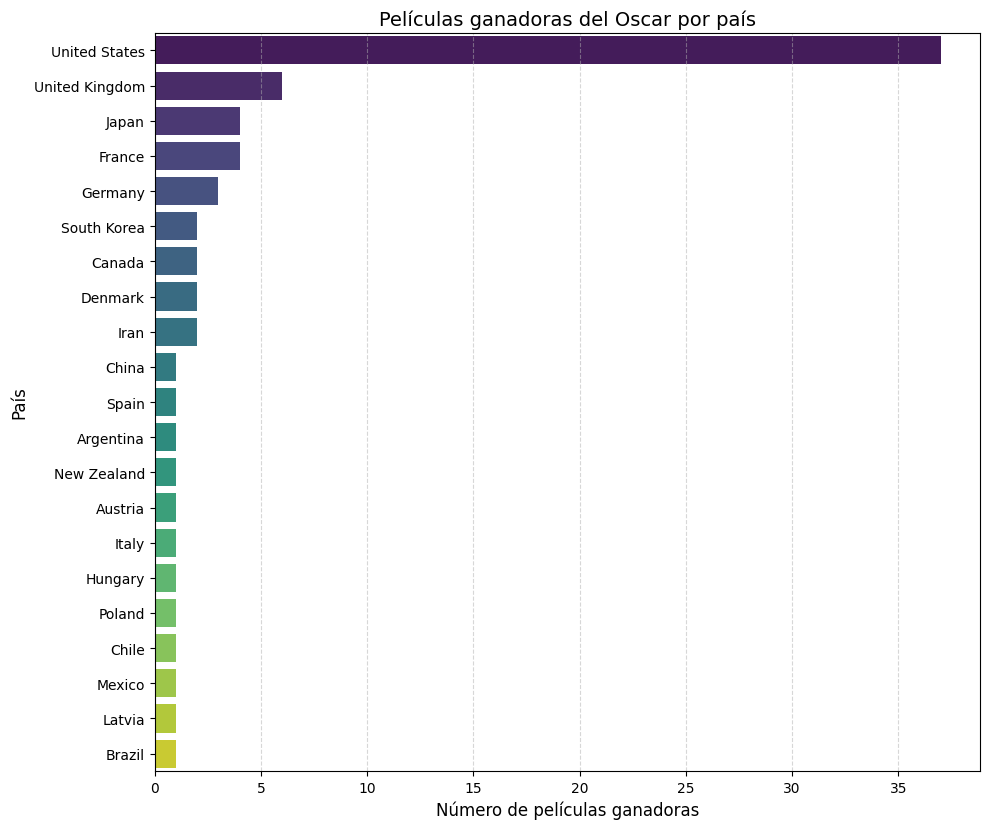

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos solo las películas ganadoras
df_ganadoras = df[df['winner'] == 'yes']

# Contamos cuántas películas ganadoras hay por país
ganadoras_por_pais = df_ganadoras['country'].value_counts().sort_values(ascending=False)

# Tamaño dinámico del gráfico según número de países
altura = len(ganadoras_por_pais) * 0.4  # ajusta el 0.4 si salen muy apretados o muy separados

# Creamos el gráfico
plt.figure(figsize=(10, altura))
sns.barplot(x=ganadoras_por_pais.values, y=ganadoras_por_pais.index, palette='viridis')

# Etiquetas y título
plt.title("Películas ganadoras del Oscar por país", fontsize=14)
plt.xlabel("Número de películas ganadoras", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
# 📌 Principales conclusiones:
# 1. 🇺🇸 Estados Unidos domina ampliamente en número de Oscars ganados,
#    reflejando el peso de Hollywood en la industria y su influencia en la Academia.
# 2. 🇬🇧 Reino Unido ocupa el segundo lugar, aunque con mucha menos diferencia.
# 3. 🇯🇵 Japón, 🇫🇷 Francia y 🇩🇪 Alemania también tienen una presencia notable.
# 4. 🌎 Países latinoamericanos como 🇲🇽 México, 🇦🇷 Argentina y 🇨🇱 Chile aparecen,
#    pero con muy pocos premios, lo cual muestra una participación más limitada.
# 🔍 Este gráfico invita a preguntarse:
#    - ¿Existe relación entre inversión (presupuesto) y Oscars ganados?
#    - ¿Qué países logran un mejor rendimiento (€ por Oscar)?
#    - ¿Son siempre los países más premiados los que más invierten?

C:\Users\franc\AppData\Local\Temp\ipykernel_21880\3604286347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=presupuesto_por_pais.values, y=presupuesto_por_pais.index, palette='coolwarm')


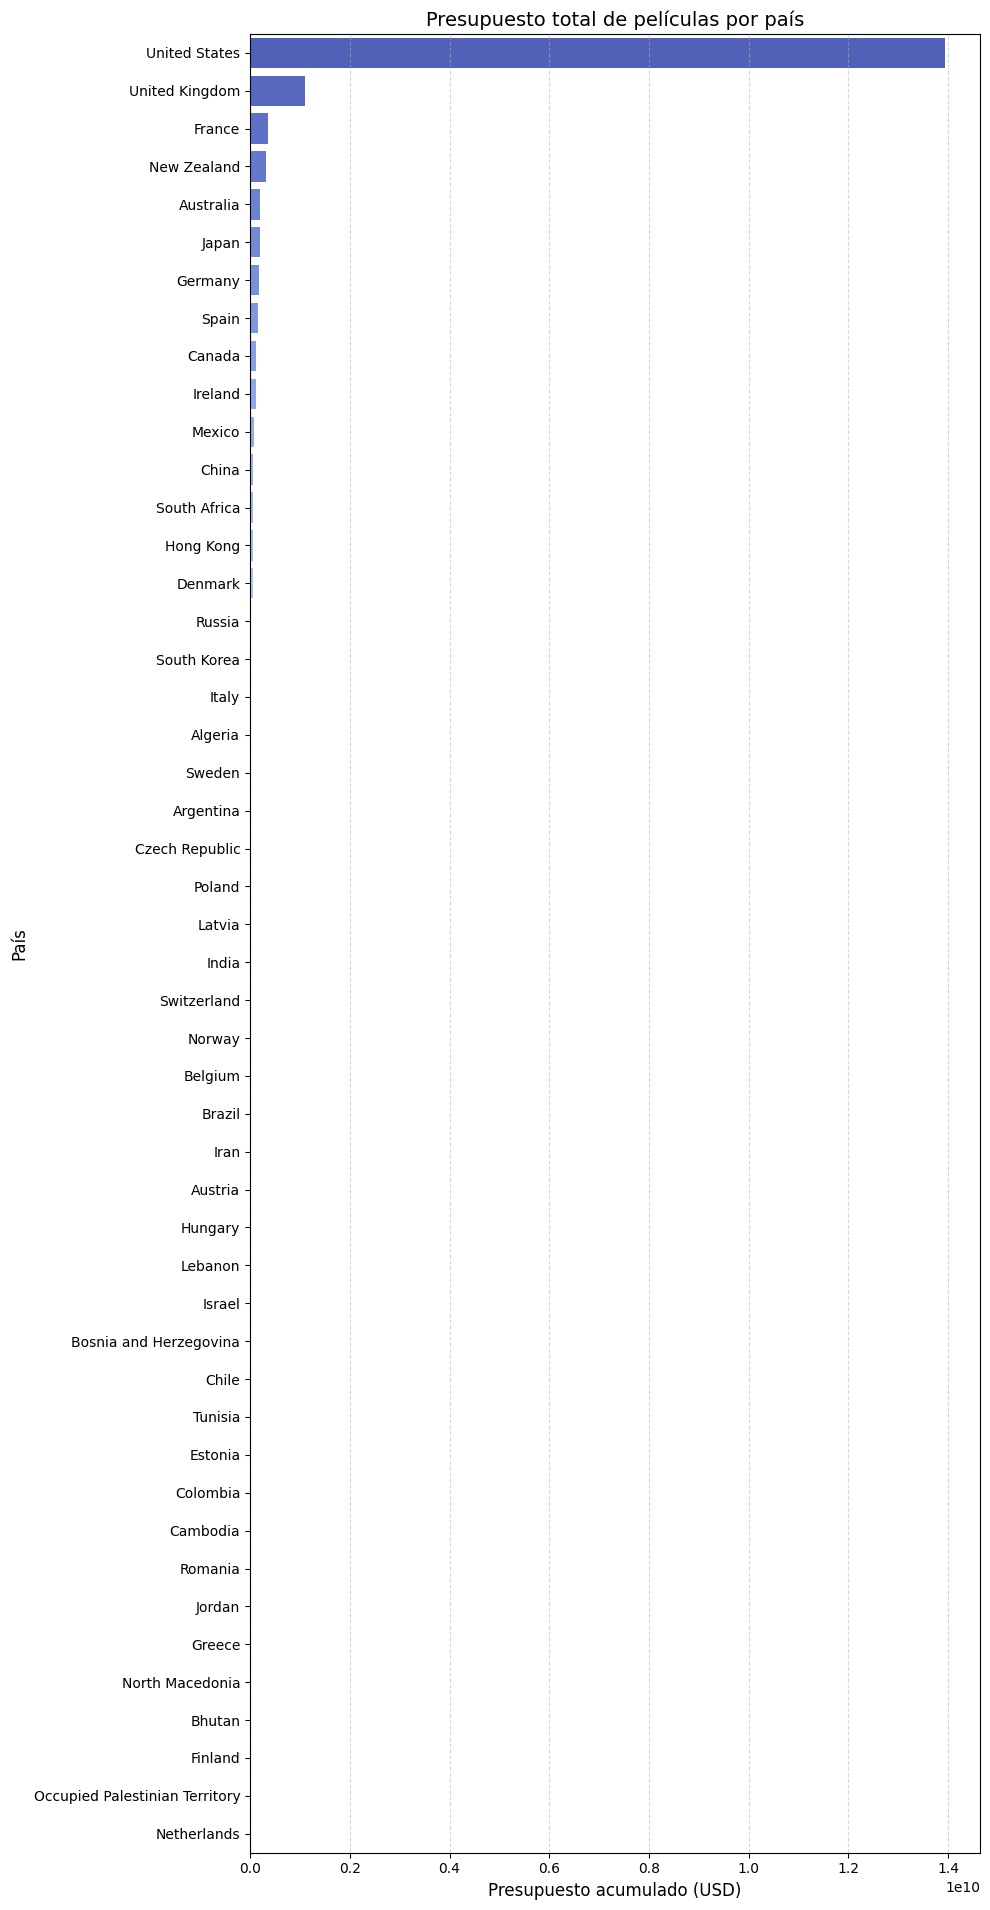

In [7]:
# Agrupamos por país y sumamos el presupuesto
presupuesto_por_pais = df.groupby('country')['budget'].sum().sort_values(ascending=False)

# Calculamos altura dinámica igual que antes
altura = len(presupuesto_por_pais) * 0.4

# Creamos el gráfico
plt.figure(figsize=(10, altura))
sns.barplot(x=presupuesto_por_pais.values, y=presupuesto_por_pais.index, palette='coolwarm')

# Etiquetas y título
plt.title("Presupuesto total de películas por país", fontsize=14)
plt.xlabel("Presupuesto acumulado (USD)", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [8]:
# 📌 Principales conclusiones:
# 1. 🇺🇸 Estados Unidos destaca de forma aplastante, con más de **13.000 millones USD** invertidos.
#    → Esto confirma su liderazgo absoluto en producción cinematográfica.
# 2. 🇬🇧 Reino Unido aparece en segundo lugar con cerca de **2.000 millones USD**.
# 3. 🇫🇷 Francia se sitúa en tercera posición, aunque con una inversión ya mucho menor (**<500 millones USD**).
# 4. La mayoría de países tienen presupuestos acumulados muy pequeños (<100 millones USD),
#    lo cual indica una menor capacidad de producción a gran escala.
# 🧠 Este gráfico permite cruzar preguntas con el anterior:
#    - ¿Quién saca más rendimiento por cada dólar invertido?
#    - ¿Cuántos Oscars se han conseguido en relación con este gasto?
#    - ¿Existen países que con menos presupuesto han ganado más Oscars que otros?
# 💡 En próximos gráficos, exploraremos el ratio Presupuesto total / Oscars ganados para responder a esto.

C:\Users\franc\AppData\Local\Temp\ipykernel_21880\1179022724.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='usd_por_oscar', y=ratio_df.index, data=ratio_df, palette='crest')


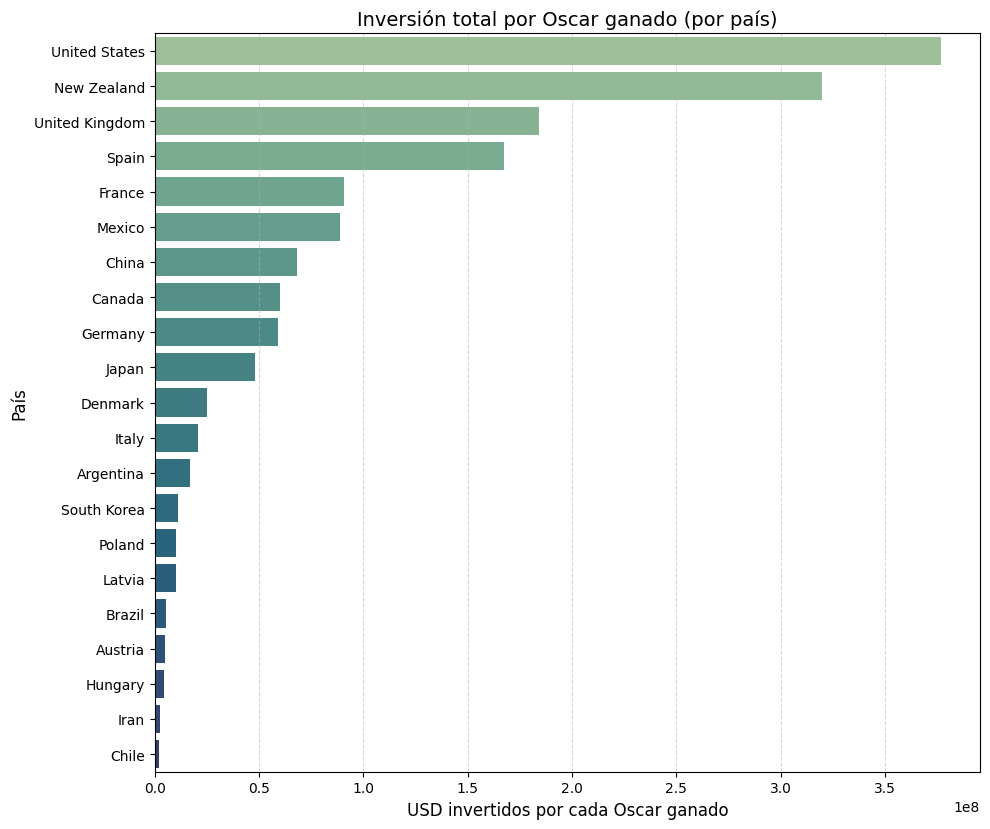

In [9]:
# Agrupamos presupuesto total por país
presupuesto_total = df.groupby('country')['budget'].sum()

# Contamos cuántas películas ganadoras del Oscar hay por país
oscars_ganados = df[df['winner'] == 'yes'].groupby('country').size()

# Unimos ambas Series en un DataFrame
ratio_df = pd.concat([presupuesto_total, oscars_ganados], axis=1)
ratio_df.columns = ['presupuesto_total', 'oscars_ganados']

# Eliminamos países con 0 Oscars para evitar división por cero
ratio_df = ratio_df[ratio_df['oscars_ganados'] > 0]

# Calculamos el ratio: USD por Oscar
ratio_df['usd_por_oscar'] = ratio_df['presupuesto_total'] / ratio_df['oscars_ganados']

# Ordenamos de mayor a menor
ratio_df = ratio_df.sort_values(by='usd_por_oscar', ascending=False)

# Visualizamos
plt.figure(figsize=(10, len(ratio_df)*0.4))
sns.barplot(x='usd_por_oscar', y=ratio_df.index, data=ratio_df, palette='crest')
plt.title("Inversión total por Oscar ganado (por país)", fontsize=14)
plt.xlabel("USD invertidos por cada Oscar ganado", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
# 📌 Principales conclusiones:
# 1. 🇺🇸 Estados Unidos, pese a ser el país con más Oscars y mayor presupuesto total,
#    tiene también el ratio más alto de inversión por Oscar ganado (~330 millones USD/Oscar),
#    lo que indica **una eficiencia baja** en términos relativos.
# 2. 🇳🇿 Nueva Zelanda y 🇬🇧 Reino Unido también presentan ratios altos (~300 y ~200 millones),
#    aunque con presupuestos mucho menores que EE.UU.
# 3. 🇪🇸 España y 🇫🇷 Francia tienen un ratio intermedio (125M y 100M aprox), lo que indica que
#    **logran buenos resultados con una inversión menor comparada**.
# 4. 🇨🇳 China, 🇲🇽 México y 🇨🇦 Canadá sorprenden con ratios más ajustados, aunque siguen siendo elevados.
# 5. 🇯🇵 Japón, 🇮🇷 Irán y países con menos presupuesto como 🇧🇷 Brasil o 🇭🇺 Hungría tienen una relación mucho más eficiente:
#    → Menor gasto, pero mayor rendimiento por dólar invertido.
# 🚩 Algunos países como 🇨🇱 Chile tienen ratios no comparables (pueden deberse a 1 Oscar y poco presupuesto total).
# 💡 Este gráfico cierra el análisis cruzado de:
#    1️⃣ Número de Oscars ganados
#    2️⃣ Presupuesto total por país
#    3️⃣ Eficiencia del gasto (este gráfico)

C:\Users\franc\AppData\Local\Temp\ipykernel_21880\3866693033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


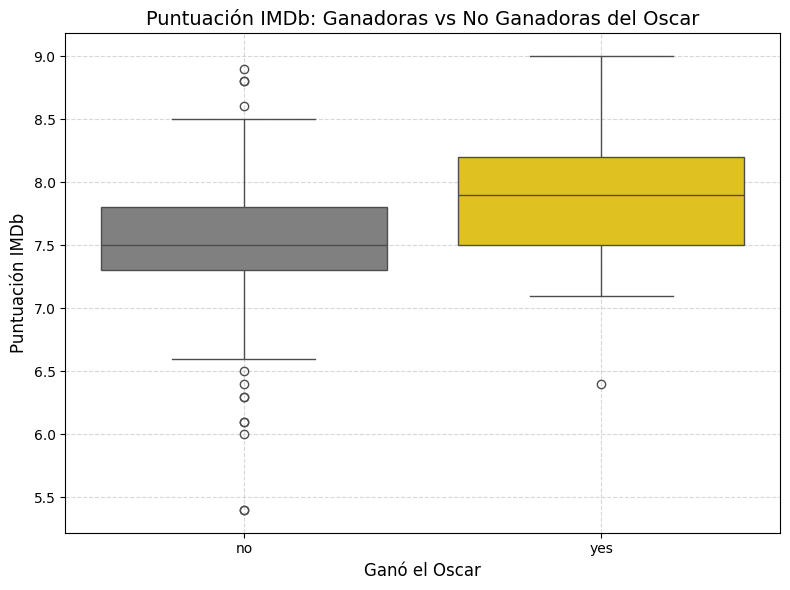

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Boxplot comparando puntuaciones IMDb entre ganadoras y no ganadoras del Oscar
sns.boxplot(
    data=df,             # tu DataFrame cargado correctamente
    x='winner',          # columna que indica si ganó el Oscar
    y='imdbRating',      # puntuación IMDb real (nombre correcto)
    palette={'yes': 'gold', 'no': 'gray'}  # colores visualmente intuitivos
)

# Títulos y etiquetas
plt.title("Puntuación IMDb: Ganadoras vs No Ganadoras del Oscar", fontsize=14)
plt.xlabel("Ganó el Oscar", fontsize=12)
plt.ylabel("Puntuación IMDb", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_21880\2645989311.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\franc\AppData\Local\Temp\ipykernel_21880\2645989311.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


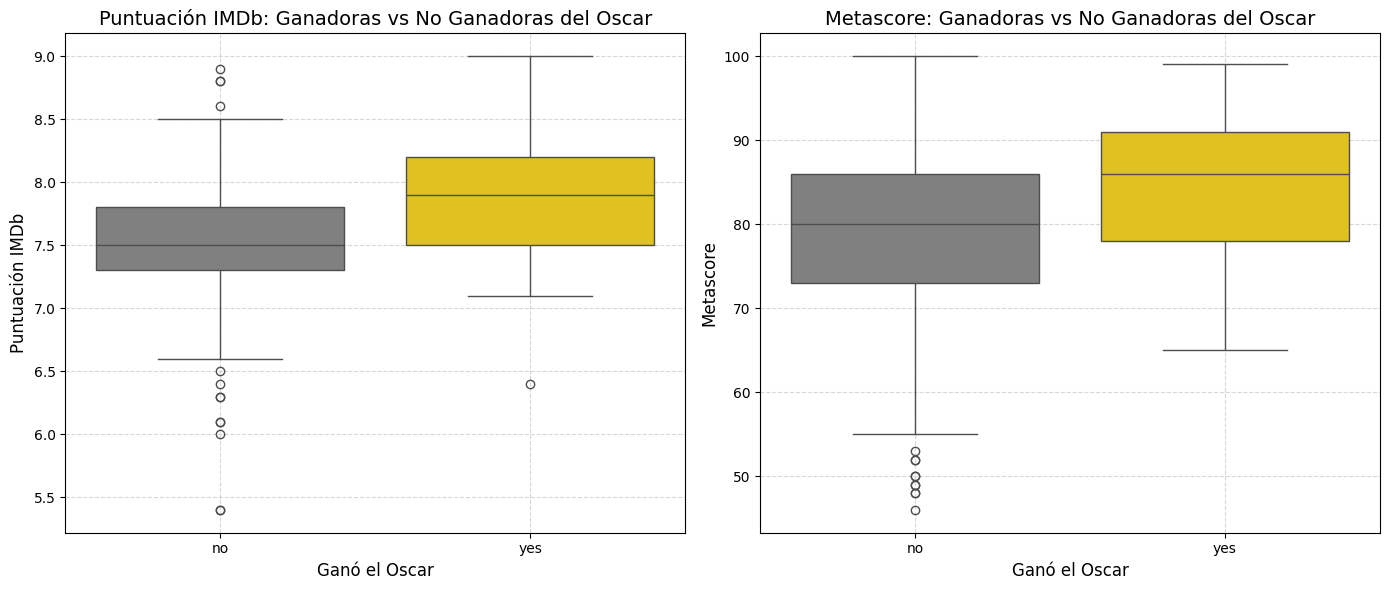

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Gráfico 1: IMDb Rating
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df,
    x='winner',
    y='imdbRating',
    palette={'yes': 'gold', 'no': 'gray'}
)
plt.title("Puntuación IMDb: Ganadoras vs No Ganadoras del Oscar", fontsize=14)
plt.xlabel("Ganó el Oscar", fontsize=12)
plt.ylabel("Puntuación IMDb", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Gráfico 2: Metascore
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df,
    x='winner',
    y='metascore',
    palette={'yes': 'gold', 'no': 'gray'}
)
plt.title("Metascore: Ganadoras vs No Ganadoras del Oscar", fontsize=14)
plt.xlabel("Ganó el Oscar", fontsize=12)
plt.ylabel("Metascore", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [13]:
# ░░ CONCLUSIONES: PUNTUACIONES IMDb Y METASCORE (GANADORAS vs NO GANADORAS) ░░

# 1. Las películas ganadoras del Oscar presentan en general una mayor puntuación media tanto en IMDb (público)
#    como en Metascore (crítica profesional), con medianas visiblemente más altas en ambos casos.

# 2. En IMDb (izquierda), aunque hay cierto solapamiento, las ganadoras suelen tener una media de entre 7.5 y 8.5,
#    mientras que las no ganadoras tienden a quedarse entre 6.5 y 7.5.

# 3. En Metascore (derecha), la diferencia es más clara: las ganadoras están más concentradas en la franja alta
#    (80-95), mientras que las no ganadoras tienen más dispersión y mayor presencia en valores bajos (<70).

# 4. La crítica parece valorar aún más que el público a las películas ganadoras, lo que sugiere que el premio
#    tiende a coincidir con estándares técnicos/artísticos reconocidos por los profesionales.

# 5. En conjunto, estos gráficos indican que ganar el Oscar suele estar asociado con un reconocimiento doble:
#    tanto de la crítica como de la audiencia.


#las películas premiadas no solo recaudan más (ver gráfico ROI), sino que también tienden a tener mejor calidad percibida desde ambas perspectivas.

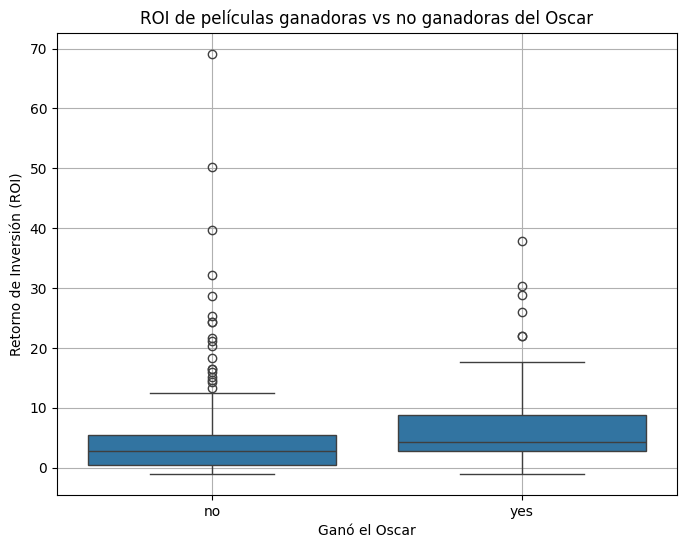

In [14]:
# Comparativa de ROI entre ganadoras y no ganadoras

# ¿Tienen mayor retorno de inversión las películas que ganaron el Oscar frente a las que no?

# Filtramos outliers extremos del ROI para una visualización más clara
# Aquí se eliminan las películas con ROI superior a 1000 (muy extremos)
df_filtrado = df[df["ROI"] < 1000]



# Creamos un diagrama de caja para comparar el ROI entre ganadoras y no ganadoras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(data=df_filtrado, x='winner', y='ROI')  # Comparación ROI por columna 'winner'
plt.title("ROI de películas ganadoras vs no ganadoras del Oscar")  # Título del gráfico
plt.xlabel("Ganó el Oscar")  # Etiqueta del eje X
plt.ylabel("Retorno de Inversión (ROI)")  # Etiqueta del eje Y
plt.grid(True)  # Muestra rejilla para mejor lectura
plt.show()  # Muestra el gráfico

In [15]:

#CONCLUSIÓN
#La mediana de ROI de las ganadoras (yes) es un poco más alta que la de las no ganadoras (no), pero no muchísimo.

#Hay más outliers con ROI muy alto entre las que no ganaron, lo cual es interesante.

#En ambos grupos hay películas que perdieron dinero (valores por debajo de 1 o incluso negativos).

#Las películas ganadoras del Oscar no garantizan un ROI más alto... pero en media o mediana, sí tienden a ir un poco mejor.

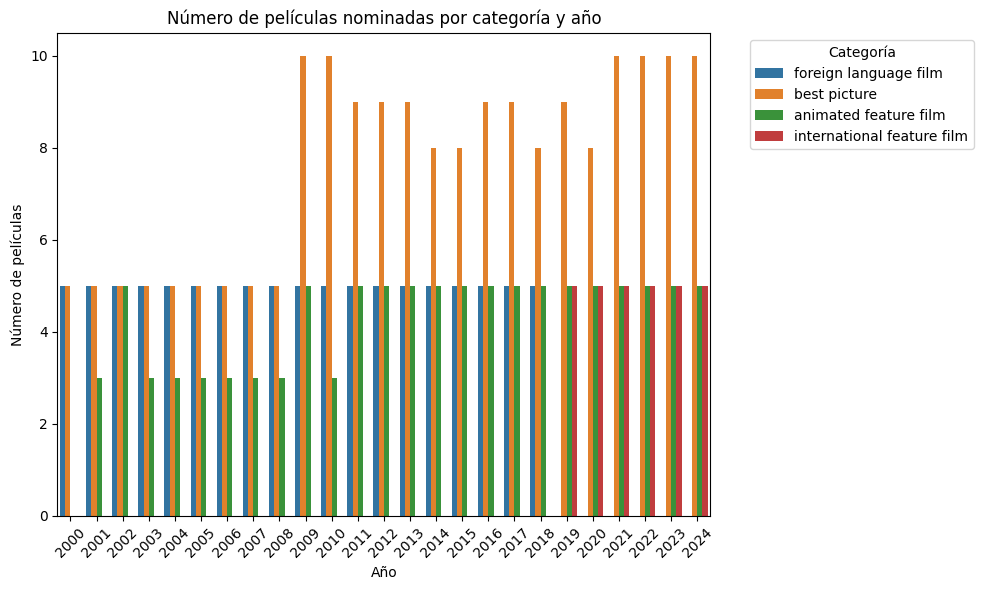

In [16]:
#¿Qué categorías han ganado protagonismo con el tiempo?

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', hue='category')
plt.title("Número de películas nominadas por categoría y año")
plt.xticks(rotation=45)
plt.xlabel("Año")
plt.ylabel("Número de películas")
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [17]:
# ░░ CONCLUSIONES: EVOLUCIÓN DE NOMINACIONES POR CATEGORÍA (2000–2024) ░░

# 1. La categoría "best picture" (mejor película) ha incrementado notablemente su número de nominaciones desde 2009,
#    pasando de 5 películas nominadas a 8-10 anuales, consolidando su protagonismo en la gala.

# 2. Las categorías "foreign language film" y "international feature film" reflejan una transición:
#    - "foreign language film" desaparece tras 2018.
#    - "international feature film" surge en 2019 y la reemplaza, manteniendo el mismo número de nominadas (~5).
#    Esto evidencia un cambio de nomenclatura más inclusiva y actualizada, sin variar el cupo.

# 3. La categoría "animated feature film" mantiene un comportamiento muy estable, con 3 nominadas en los primeros años
#    y 5 a partir de aproximadamente 2010. Muestra solidez como categoría consolidada en el panorama del cine.

# 4. En conjunto, el gráfico permite ver cómo la Academia ha mantenido constante la atención en cine internacional y animado,
#    mientras que ha ampliado el foco en la categoría principal ("best picture"), lo que sugiere un interés por representar
#    mayor diversidad de estilos y géneros dentro de las películas más reconocidas.

# ░Evolución estructural en los Oscars,
#    tanto en nomenclatura como en volumen de representación.


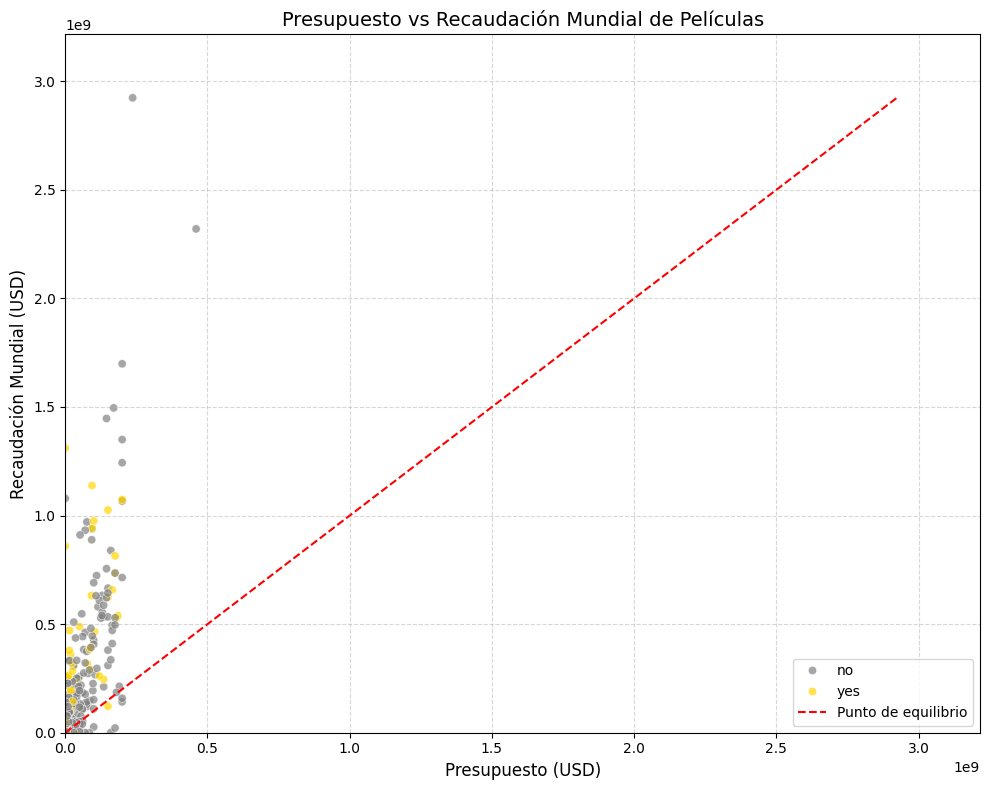

In [18]:
#Relación entre presupuesto y recaudación global (Worlwide boxoffice)

import matplotlib.pyplot as plt
import seaborn as sns

# Creamos la figura
plt.figure(figsize=(10, 8))

# Scatter plot con presupuesto vs recaudación global
sns.scatterplot(
    data=df,
    x='budget',
    y='Worlwide boxoffice',
    hue='winner',
    palette={'yes': 'gold', 'no': 'gray'},
    alpha=0.7
)

# Línea diagonal: punto de equilibrio (presupuesto = recaudación)
max_value = max(df['budget'].max(), df['Worlwide boxoffice'].max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Punto de equilibrio')

# Títulos y etiquetas
plt.title('Presupuesto vs Recaudación Mundial de Películas', fontsize=14)
plt.xlabel('Presupuesto (USD)', fontsize=12)
plt.ylabel('Recaudación Mundial (USD)', fontsize=12)

# Rejilla, leyenda, límites centrados
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(0, max_value * 1.1)
plt.ylim(0, max_value * 1.1)

# Mejor distribución del espacio
plt.tight_layout()
plt.show()

In [19]:
# ░░ CONCLUSIONES: PRESUPUESTO VS RECAUDACIÓN MUNDIAL ░░

# 1. La mayoría de las películas están situadas **por encima de la línea roja diagonal** (punto de equilibrio),
#    lo que indica que **recaudan más de lo que cuestan**. Es decir, la mayoría obtienen beneficios.

# 2. Las películas ganadoras del Oscar (en amarillo) **no dominan necesariamente las mayores recaudaciones**.
#    Aunque muchas están por encima de la línea (beneficio), no son mayoría en la zona de éxitos económicos extremos.

# 3. Se observa una **alta concentración en el rango bajo de presupuestos y recaudaciones**, pero con excepciones
#    notables (algunas películas logran ingresos de más de 3.000 millones USD).

# 4. Hay una dispersión considerable: algunas películas tienen presupuestos modestos y logran un ROI sobresaliente;
#    otras con presupuestos altos no alcanzan el punto de equilibrio, lo cual **demuestra que una gran inversión
#    no garantiza el éxito comercial**.

# 5. La línea roja ayuda visualmente a identificar **qué películas pierden dinero (bajo la línea)** y **cuáles son rentables (sobre ella)**.

# ░░ 
#    Este gráfico es clave para demostrar que el prestigio de los Oscars no siempre coincide con el rendimiento económico,
#    y que el éxito comercial puede darse fuera del circuito de premios.
